In [14]:
'''
N.B. to run this notebook use "pip3 install ipympl" (if you don't already have it) and restart the kernel
'''

import pandas as pd
import numpy as np
%matplotlib ipympl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

def demand(ul: float, uf: float):
    return 2 - ul + (0.3 * uf)

def daily_profit(ul: float, uf: float, c: float):
    return (ul - c) * demand(ul, uf)

# import data.xlsx
data_path = "comp34612/data.xlsx"
xls = pd.ExcelFile(data_path)

f1m = pd.read_excel(xls, 'Follower_Mk1')
f2m = pd.read_excel(xls, 'Follower_Mk2')
f3m = pd.read_excel(xls, 'Follower_Mk3')

data = f1m

In [15]:
# Create a 3D graph with axes: Leader price, iteration, Follower price
t = [i for i in range(1, 101)]
leader_price = data.iloc[:, 1]
follower_price = data.iloc[:, 2]
costs = data.iloc[:, 3]

demand_list = []
t = [i for i in range(1, 101)]
for i in range(100):
    demand_list.append(demand(leader_price.iloc[i], follower_price.iloc[i]))

profit_list = []
t = [i for i in range(1, 101)]
for i in range(100):
    profit_list.append(daily_profit(leader_price.iloc[i], follower_price.iloc[i], costs.iloc[i]))


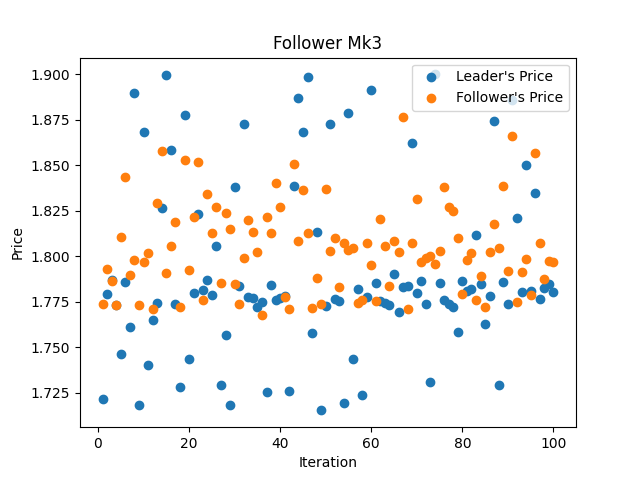

In [16]:
# Plot and export 2D scatter plots of Follower Mk1
plt.clf()
plt.scatter(t, leader_price, label="Leader's Price")
plt.scatter(t, follower_price, label="Follower's Price")
plt.xlabel("Iteration")
plt.ylabel("Price")
plt.legend()
plt.title("Follower Mk3")
plt.savefig("graphs/follower_mk1.png")
plt.show()

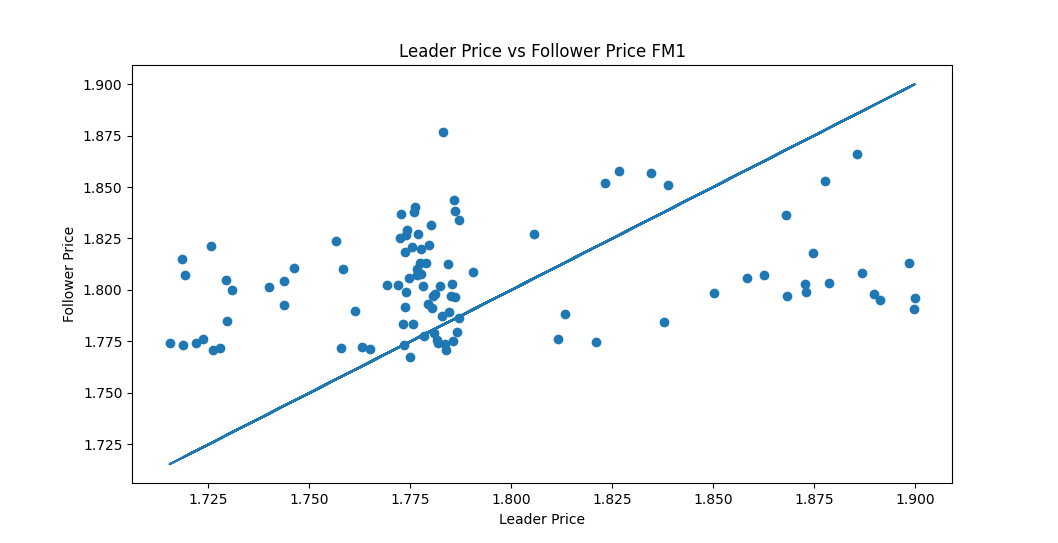

In [17]:
# Plot leader price vs follower price on new graph
plt.clf()
plt.plot(leader_price, leader_price, label="Leader Price")
plt.scatter(leader_price, follower_price)
plt.xlabel("Leader Price")
plt.ylabel("Follower Price")
plt.title("Leader Price vs Follower Price FM1")
plt.savefig("graphs/fm1_leader_vs_follower.png")
plt.show()

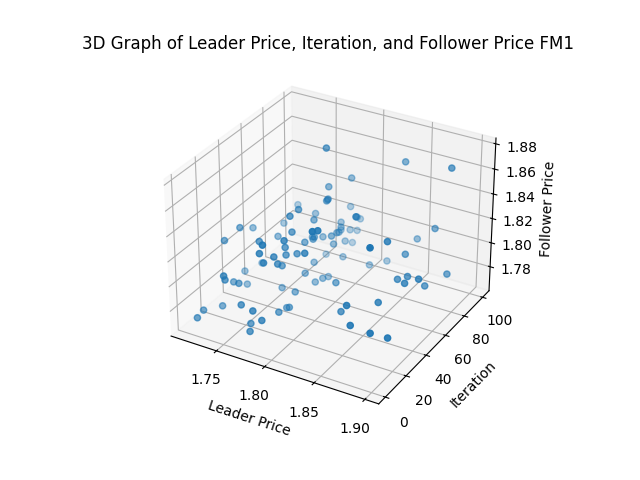

In [18]:
plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(leader_price, t, follower_price)
ax.set_xlabel("Leader Price")
ax.set_ylabel("Iteration")
ax.set_zlabel("Follower Price")
ax.set_title("3D Graph of Leader Price, Iteration, and Follower Price FM1")

fig.savefig("graphs/fm1_3d_graph.png")

plt.show()

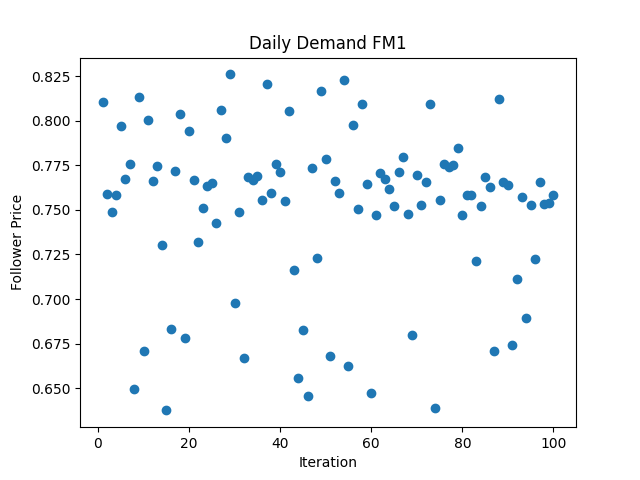

In [19]:
# Create demand graph
plt.clf()
plt.scatter(t, demand_list)
plt.xlabel("Iteration")
plt.ylabel("Follower Price")
plt.title("Daily Demand FM1")
plt.savefig("graphs/fm1_demand.png")
plt.show()

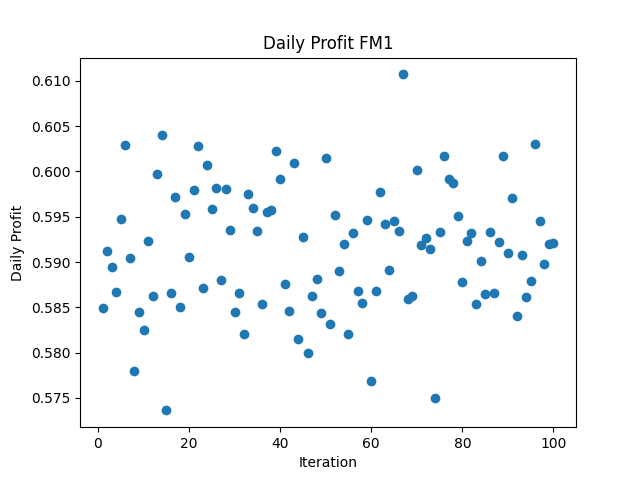

In [20]:
# Create daily profit graph
plt.clf()
plt.scatter(t, profit_list)
plt.xlabel("Iteration")
plt.ylabel("Daily Profit")
plt.title("Daily Profit FM1")
plt.savefig("graphs/fm1_profit.png")
plt.show()

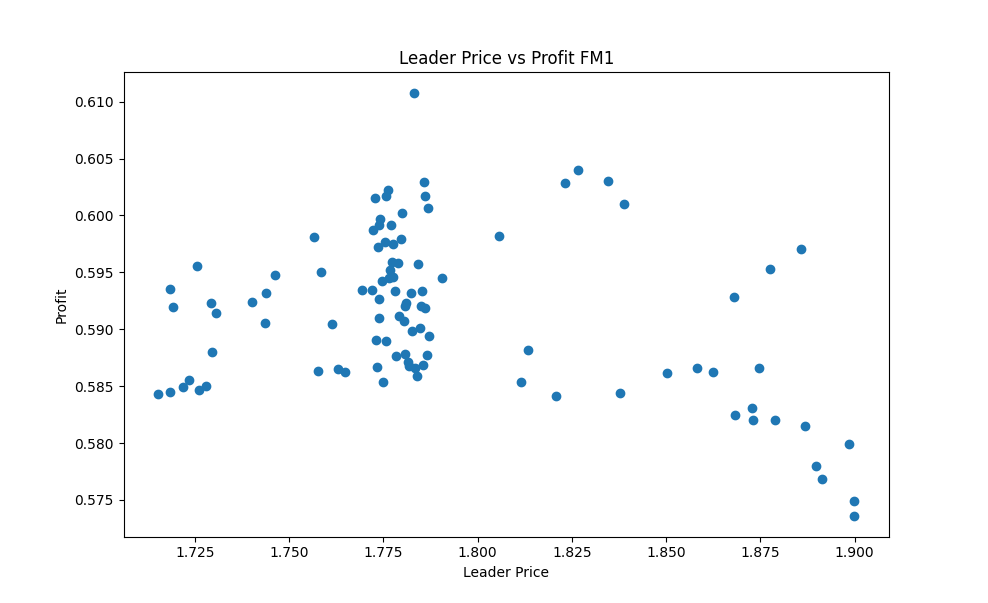

In [26]:
# Create Leader Price vs Profit Graph
plt.clf()
plt.scatter(leader_price, profit_list)
plt.xlabel("Leader Price")
plt.ylabel("Profit")
plt.title("Leader Price vs Profit FM1")
plt.savefig("graphs/lp_profit_fm1.png")
plt.show()

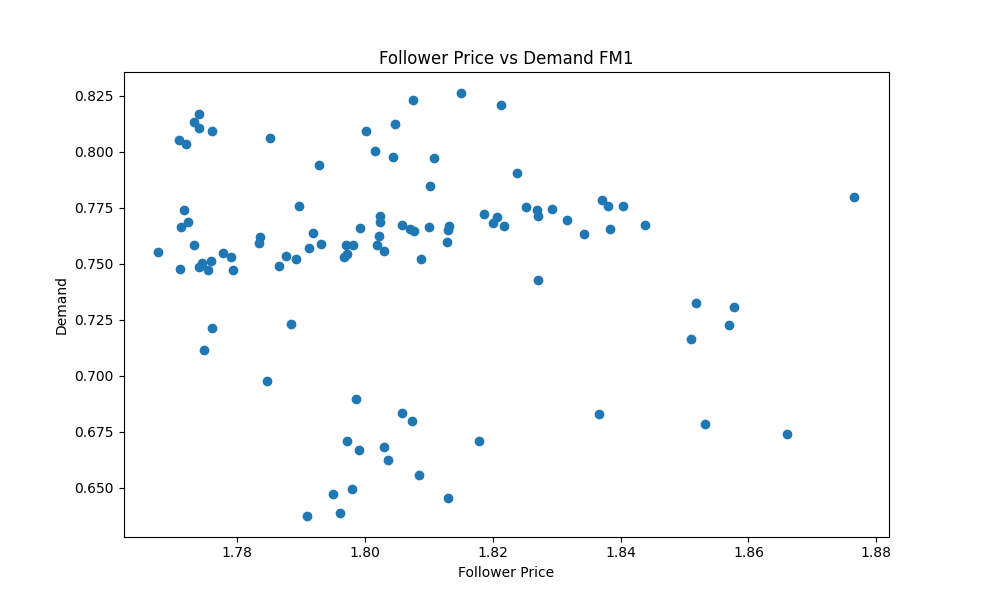

In [27]:
# Follower Price vs Demand
plt.clf()
plt.scatter(follower_price, demand_list)
plt.xlabel("Follower Price")
plt.ylabel("Demand")
plt.title("Follower Price vs Demand FM1")
plt.savefig("graphs/fp_demand_fm1.png")
plt.show()

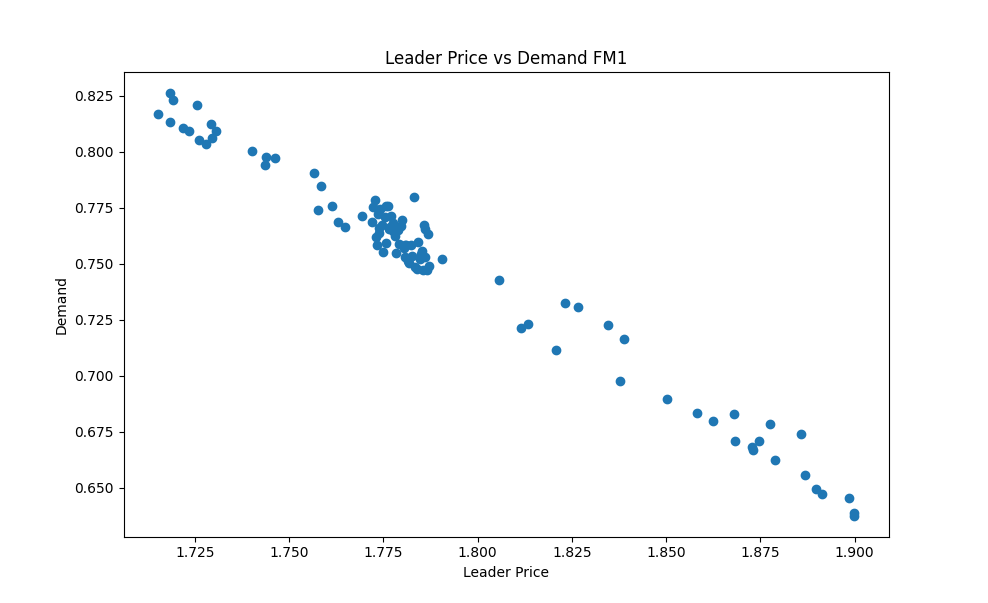

In [28]:
# Leader Price vs Demand
plt.clf()
plt.scatter(leader_price, demand_list)
plt.xlabel("Leader Price")
plt.ylabel("Demand")
plt.title("Leader Price vs Demand FM1")
plt.savefig("graphs/lp_demand_fm1.png")
plt.show()

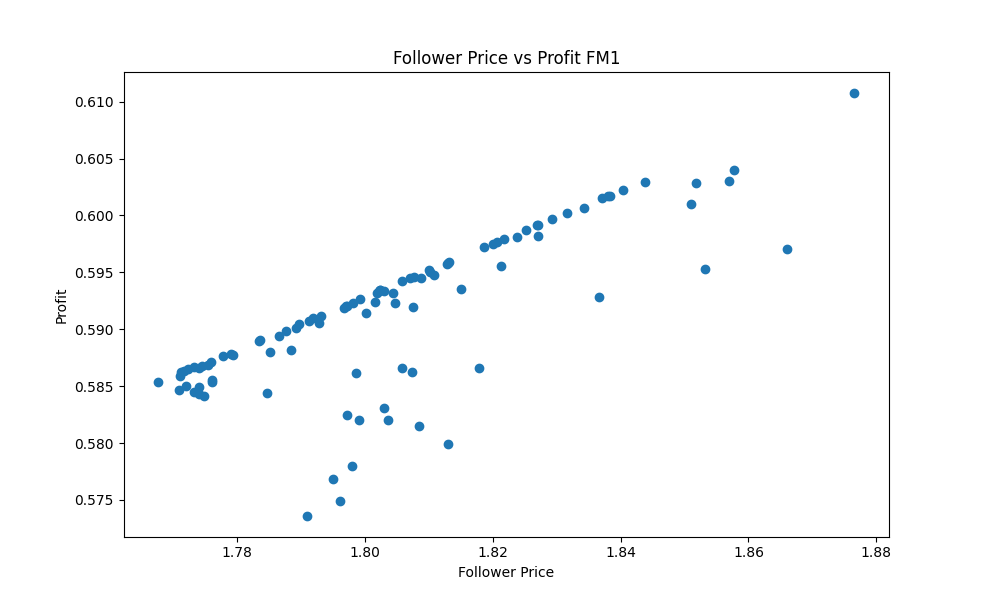

In [29]:
# Follower Price vs Profit
plt.clf()
plt.scatter(follower_price, profit_list)
plt.xlabel("Follower Price")
plt.ylabel("Profit")
plt.title("Follower Price vs Profit FM1")
plt.savefig("graphs/fp_profit_fm1.png")
plt.show()

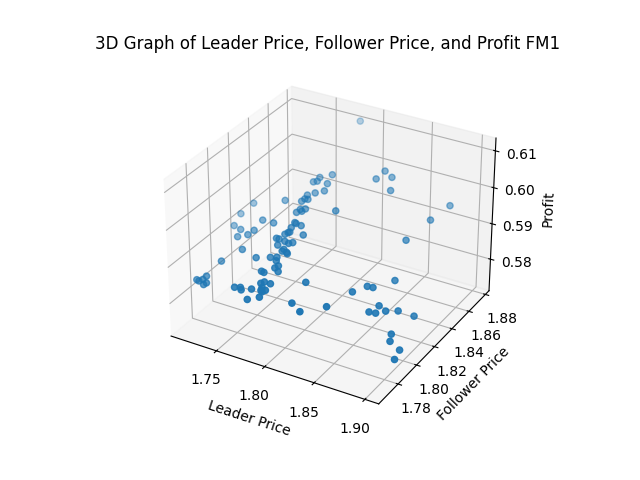

In [30]:
# 3D graph comparing leader price, follower price, and profit
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')

ax2.scatter(leader_price, follower_price, profit_list)
ax2.set_xlabel("Leader Price")
ax2.set_ylabel("Follower Price")
ax2.set_zlabel("Profit")
ax2.set_title("3D Graph of Leader Price, Follower Price, and Profit FM1")

fig2.savefig("graphs/fm1_lp_fp_prof_3d_graph.png")
plt.show()


In [13]:
# Correlation Details
print(f"LP-FP Correlation: {np.corrcoef(leader_price, follower_price)[0, 1]}")
print(f"LP-FP Covariance: {np.cov(leader_price, follower_price)[0, 1]}")
print(f"LP-T Correlation: {np.corrcoef(leader_price, t)[0, 1]}")
print(f"LP-T Covariance: {np.cov(leader_price, t)[0, 1]}")
print(f"T-FP Correlation: {np.corrcoef(t, follower_price)[0, 1]}")
print(f"T-FP Covariance: {np.cov(t, follower_price)[0, 1]}")
print(f"LP-Dem Correlation: {np.corrcoef(leader_price, demand_list)[0, 1]}")
print(f"LP-Prof Correlation: {np.corrcoef(leader_price, profit_list)[0, 1]}")
print(f"FP-Dem Correlation: {np.corrcoef(follower_price, demand_list)[0, 1]}")
print(f"FP-Prof Correlation: {np.corrcoef(follower_price, profit_list)[0, 1]}")
print(f"T-Dem Correlation: {np.corrcoef(t, demand_list)[0, 1]}")
print(f"T-Prof Correlation: {np.corrcoef(t, profit_list)[0, 1]}")

LP-FP Correlation: 0.2557139337302192
LP-FP Covariance: 0.0002960713005490903
LP-T Correlation: 0.055073707165367795
LP-T Covariance: 0.07566265601753866
T-FP Correlation: 0.008783344817196974
T-FP Covariance: 0.006230239002265965
LP-Dem Correlation: -0.9880620549367356
LP-Prof Correlation: -0.32036894218011963
FP-Dem Correlation: -0.1037268221585992
FP-Prof Correlation: 0.7659656782318428
T-Dem Correlation: -0.0552607826309872
T-Prof Correlation: 0.056805343448155486
